In [149]:
%matplotlib notebook


In [261]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

from pylab import rcParams
import seaborn as sb
from numpy.random import randn

In [300]:
%matplotlib inline
rcParams['figure.figsize'] = 25, 25
sb.set_style('whitegrid')

In [276]:
noaa_data = "data/storm_data_search_results.csv"

noaa = pd.read_csv(noaa_data, index_col='BEGIN_DATE', parse_dates = True)

noaa_df = pd.DataFrame(noaa)
noaa_df

,EVENT_ID,CZ_NAME_STR,BEGIN_LOCATION,BEGIN_TIME,EVENT_TYPE,MAGNITUDE,TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
BEGIN_DATE,,,,,,,,,,,,,,,,,,,,,
1955-03-05,10075745,ROCKINGHAM CO.,,1430,Hail,0.75,,0,0,0,...,,03/05/1955,1430,36.50,-79.68,,,NaN,NaN,1
1955-03-05,10075746,DURHAM CO.,,1615,Hail,1.50,,0,0,0,...,,03/05/1955,1615,36.20,-78.78,,,NaN,NaN,2
1955-03-12,10075747,MECKLENBURG CO.,,120,Hail,1.00,,0,0,0,...,,03/12/1955,120,35.20,-80.90,,,NaN,NaN,3
1955-03-12,10075748,MECKLENBURG CO.,,1602,Hail,0.75,,0,0,0,...,,03/12/1955,1602,35.28,-80.90,,,NaN,NaN,4
1955-04-06,10075751,CO.,,2100,Hail,1.00,,0,0,0,...,,04/06/1955,2100,35.08,-81.08,,,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-06-05,10089040,FORSYTH CO.,,1550,Hail,0.75,,0,0,0,...,,06/05/1985,1550,36.10,-80.25,,,NaN,NaN,496
1985-06-05,10089042,GUILFORD CO.,,1555,Hail,1.25,,0,0,0,...,,06/05/1985,1555,36.07,-79.80,,,NaN,NaN,497
1985-06-05,10089044,CATAWBA CO.,,1619,Hail,1.00,,0,0,0,...,,06/05/1985,1619,35.70,-81.22,,,NaN,NaN,498


In [282]:
noaa_renamed_df = noaa_df.rename(columns={"CZ_NAME_STR": "Affected County",
                                          "MAGNITUDE": "Diameter(inches)"})
noaa_renamed_df

,EVENT_ID,Affected County,BEGIN_LOCATION,BEGIN_TIME,EVENT_TYPE,Diameter(inches),TOR_F_SCALE,DEATHS_DIRECT,INJURIES_DIRECT,DAMAGE_PROPERTY_NUM,...,END_LOCATION,END_DATE,END_TIME,BEGIN_LAT,BEGIN_LON,END_LAT,END_LON,EVENT_NARRATIVE,EPISODE_NARRATIVE,ABSOLUTE_ROWNUMBER
BEGIN_DATE,,,,,,,,,,,,,,,,,,,,,
1955-03-05,10075745,ROCKINGHAM CO.,,1430,Hail,0.75,,0,0,0,...,,03/05/1955,1430,36.50,-79.68,,,NaN,NaN,1
1955-03-05,10075746,DURHAM CO.,,1615,Hail,1.50,,0,0,0,...,,03/05/1955,1615,36.20,-78.78,,,NaN,NaN,2
1955-03-12,10075747,MECKLENBURG CO.,,120,Hail,1.00,,0,0,0,...,,03/12/1955,120,35.20,-80.90,,,NaN,NaN,3
1955-03-12,10075748,MECKLENBURG CO.,,1602,Hail,0.75,,0,0,0,...,,03/12/1955,1602,35.28,-80.90,,,NaN,NaN,4
1955-04-06,10075751,CO.,,2100,Hail,1.00,,0,0,0,...,,04/06/1955,2100,35.08,-81.08,,,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1985-06-05,10089040,FORSYTH CO.,,1550,Hail,0.75,,0,0,0,...,,06/05/1985,1550,36.10,-80.25,,,NaN,NaN,496
1985-06-05,10089042,GUILFORD CO.,,1555,Hail,1.25,,0,0,0,...,,06/05/1985,1555,36.07,-79.80,,,NaN,NaN,497
1985-06-05,10089044,CATAWBA CO.,,1619,Hail,1.00,,0,0,0,...,,06/05/1985,1619,35.70,-81.22,,,NaN,NaN,498


In [283]:
nc_hail_df = noaa_renamed_df[["Affected County", "EVENT_TYPE", "Diameter(inches)"]]
nc_hail_df.head()

,Affected County,EVENT_TYPE,Diameter(inches)
BEGIN_DATE,,,
1955-03-05,ROCKINGHAM CO.,Hail,0.75
1955-03-05,DURHAM CO.,Hail,1.50
1955-03-12,MECKLENBURG CO.,Hail,1.00
1955-03-12,MECKLENBURG CO.,Hail,0.75
1955-04-06,CO.,Hail,1.00


In [284]:
nc_hail_df

,Affected County,EVENT_TYPE,Diameter(inches)
BEGIN_DATE,,,
1955-03-05,ROCKINGHAM CO.,Hail,0.75
1955-03-05,DURHAM CO.,Hail,1.50
1955-03-12,MECKLENBURG CO.,Hail,1.00
1955-03-12,MECKLENBURG CO.,Hail,0.75
1955-04-06,CO.,Hail,1.00
...,...,...,...
1985-06-05,FORSYTH CO.,Hail,0.75
1985-06-05,GUILFORD CO.,Hail,1.25
1985-06-05,CATAWBA CO.,Hail,1.00


In [285]:
nc_hail_df.count()

Affected County     500
EVENT_TYPE          500
Diameter(inches)    500
dtype: int64

In [288]:
no_null_hail_df = nc_hail_df.dropna(how='all')
no_null_hail_df

,Affected County,EVENT_TYPE,Diameter(inches)
BEGIN_DATE,,,
1955-03-05,ROCKINGHAM CO.,Hail,0.75
1955-03-05,DURHAM CO.,Hail,1.50
1955-03-12,MECKLENBURG CO.,Hail,1.00
1955-03-12,MECKLENBURG CO.,Hail,0.75
1955-04-06,CO.,Hail,1.00
...,...,...,...
1985-06-05,FORSYTH CO.,Hail,0.75
1985-06-05,GUILFORD CO.,Hail,1.25
1985-06-05,CATAWBA CO.,Hail,1.00


In [289]:
no_null_hail_df.count()

Affected County     500
EVENT_TYPE          500
Diameter(inches)    500
dtype: int64

In [290]:
no_null_hail_df["Diameter(inches)"].value_counts()

1.75    150
0.75    148
1.00    110
1.50     24
2.00     23
2.75     14
1.25      9
0.88      7
2.50      7
3.00      3
3.50      2
0.00      2
4.50      1
Name: Diameter(inches), dtype: int64

In [291]:
no_null_hail_df["Affected County"].value_counts()

MECKLENBURG CO.    24
CUMBERLAND CO.     21
WAKE CO.           20
SAMPSON CO.        15
COLUMBUS CO.       14
                   ..
ALEXANDER CO.       1
PERQUIMANS CO.      1
YANCEY CO.          1
GRAHAM CO.          1
HALIFAX CO.         1
Name: Affected County, Length: 88, dtype: int64

In [292]:
hail_df = no_null_hail_df
hail_df

,Affected County,EVENT_TYPE,Diameter(inches)
BEGIN_DATE,,,
1955-03-05,ROCKINGHAM CO.,Hail,0.75
1955-03-05,DURHAM CO.,Hail,1.50
1955-03-12,MECKLENBURG CO.,Hail,1.00
1955-03-12,MECKLENBURG CO.,Hail,0.75
1955-04-06,CO.,Hail,1.00
...,...,...,...
1985-06-05,FORSYTH CO.,Hail,0.75
1985-06-05,GUILFORD CO.,Hail,1.25
1985-06-05,CATAWBA CO.,Hail,1.00


In [293]:
hail_mean = hail_df.groupby('Affected County').mean()["Diameter(inches)"]
hail_mean

hail_median = hail_df.groupby('Affected County').median()["Diameter(inches)"]
hail_median

hail_variance = hail_df.groupby('Affected County').var()["Diameter(inches)"]
hail_variance

hail_std = hail_df.groupby('Affected County').std()["Diameter(inches)"]
hail_std

hail_sem = hail_df.groupby('Affected County').sem()["Diameter(inches)"]
hail_sem



Affected County
ALAMANCE CO.     0.190029
ALEXANDER CO.         NaN
ANSON CO.        0.125000
AVERY CO.        0.375000
BEAUFORT CO.     0.250000
                   ...   
WAYNE CO.        0.158333
WILKES CO.       0.187500
WILSON CO.       0.125000
YADKIN CO.       0.176777
YANCEY CO.            NaN
Name: Diameter(inches), Length: 88, dtype: float64

<AxesSubplot:title={'center':'Hail over Time'}, xlabel='BEGIN_DATE', ylabel='Diameter(inches)'>

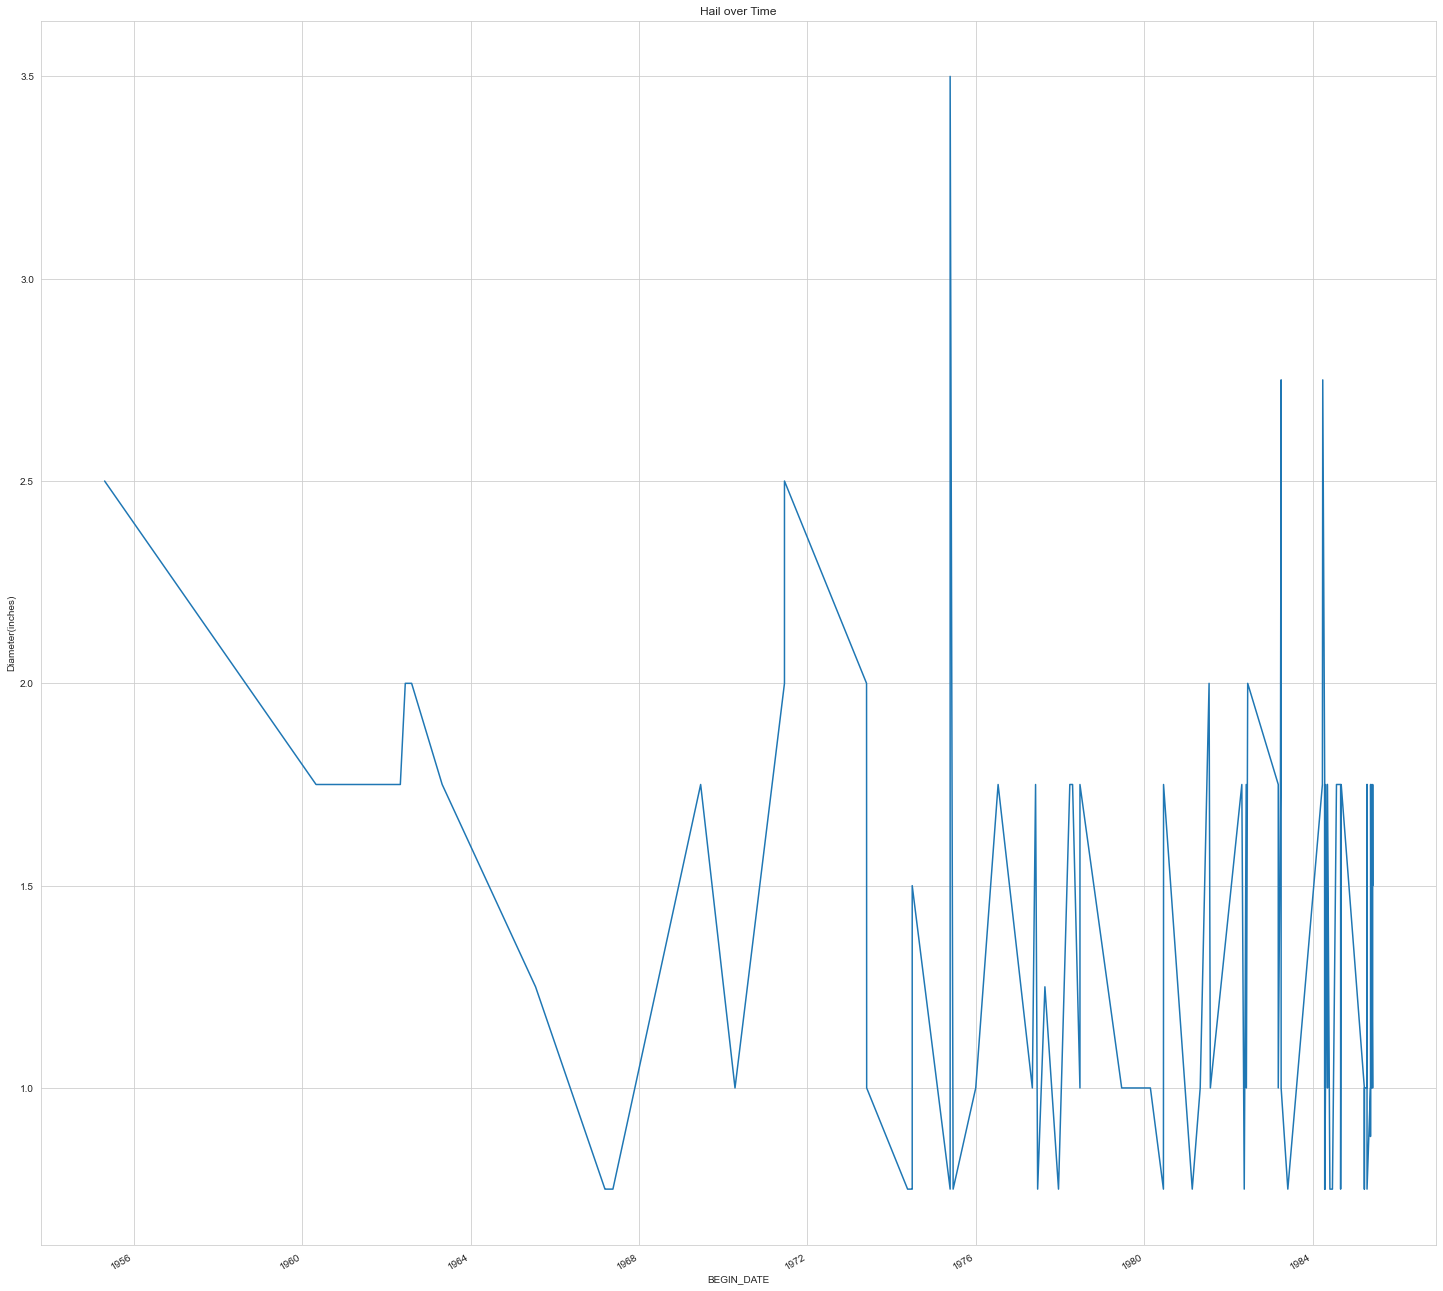

In [301]:
hail = hail_df.sample(n=100, random_state=25,axis = 0)
plt.xlabel('BEGIN_DATE')
plt.ylabel('Diameter(inches)')

plt.title('Hail over Time')

hail['Diameter(inches)'].plot()